In [1]:
import os

os.getcwd()

'd:\\ArtificialIntelligence_batch21\\src'

In [2]:
os.chdir("D:\ArtificialIntelligence_batch21\data")

In [3]:
os.getcwd()

'D:\\ArtificialIntelligence_batch21\\data'

In [4]:
data_dir = os.getcwd()
data_dir

'D:\\ArtificialIntelligence_batch21\\data'

In [5]:
data = []
labels = []

for i in os.listdir(data_dir):
   #print(i) # --> cat dog 
    for class_name in os.listdir(os.path.join(data_dir,i)):
        class_path = os.path.join(data_dir,i,class_name)
        #print(class_path)
        data.append(class_path)
        labels.append(i)

In [6]:
labels

['cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog']

Text(0.5, 0, 'cat')

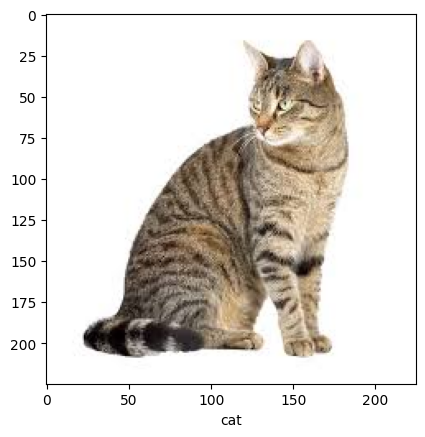

In [7]:
from matplotlib import pyplot as plt 
import cv2 

test_image = data[0]
test_label = labels[0]
test_image = cv2.imread(test_image)
convert_color = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
plt.imshow(convert_color)
plt.xlabel(test_label)

In [8]:
import numpy as np
preprocessing_image = []
for read_image in data:
    form_image = cv2.imread(read_image)
    form_image = cv2.resize(form_image, (64,64))
    form_image = np.array(form_image)
    print(form_image.shape)
    preprocessing_image.append(form_image)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [9]:
from sklearn.preprocessing import LabelEncoder 
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
labels_int = le.fit_transform(labels)
labels_onehot = to_categorical(labels_int)
labels_onehot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [10]:
from sklearn.model_selection import train_test_split 

x_train,x_test , y_train, y_test = train_test_split(preprocessing_image, labels_onehot, random_state=0, shuffle=True)

In [11]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13, 64, 64, 3)
(13, 2)
(5, 64, 64, 3)
(5, 2)


In [12]:
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

input_shape = (64,64,3)
model = Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(2, activation="softmax")
])
model.summary()

d:\anaconda3\envs\langchain\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        36,866 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,114 (508.26 KB)

 Trainable params: 130,114 (508.26 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
(3 * 3 * 3 + 1) * 32

896

In [14]:
(3 * 3 * 32 + 1) * 64

18496

In [15]:
from tensorflow.keras.optimizers import Adam 

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'] )
history = model.fit(x=x_train,y=y_train, validation_data=[x_test,y_test], epochs=100, batch_size=12)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 557ms/step - accuracy: 0.6047 - loss: 10.0781 - val_accuracy: 0.4000 - val_loss: 313.7594
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.4466 - loss: 345.9278 - val_accuracy: 0.4000 - val_loss: 99.8310
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.4466 - loss: 108.2258 - val_accuracy: 0.6000 - val_loss: 2.3848
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.7628 - loss: 1.4649 - val_accuracy: 0.6000 - val_loss: 11.5139
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6047 - loss: 9.2230 - val_accuracy: 0.4000 - val_loss: 2.6635
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.7628 - loss: 0.4313 - val_accuracy: 0.4000 - val_loss: 15.1918
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.4466 - loss: 13.4299 - val_accuracy: 0.4000 - val_loss: 4.9108
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.5256 - loss: 2.7707 - val_accuracy:

In [16]:
eval_loss, eval_acc = model.evaluate(x_test,y_test)
print(eval_loss)
print(eval_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4000 - loss: 2.4324
2.432354211807251
0.4000000059604645


In [17]:
test_image = "D:\ArtificialIntelligence_batch21\download.jpg"
test_image = cv2.imread(test_image)
cvt_color_change = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
resize_image = cv2.resize(cvt_color_change, (64,64))


In [22]:
resize_image.shape

(64, 64, 3)

In [26]:
np.array(resize_image)

array([[[189, 192, 200],
        [192, 195, 202],
        [192, 195, 202],
        ...,
        [187, 187, 195],
        [189, 189, 197],
        [187, 187, 195]],

       [[189, 192, 198],
        [191, 194, 201],
        [191, 194, 201],
        ...,
        [187, 187, 195],
        [186, 186, 194],
        [184, 184, 192]],

       [[188, 191, 198],
        [190, 193, 200],
        [190, 193, 200],
        ...,
        [184, 184, 192],
        [183, 183, 191],
        [184, 184, 192]],

       ...,

       [[204, 207, 212],
        [203, 206, 211],
        [203, 206, 211],
        ...,
        [199, 202, 211],
        [202, 205, 214],
        [203, 206, 215]],

       [[206, 209, 216],
        [206, 209, 216],
        [209, 212, 219],
        ...,
        [198, 201, 208],
        [200, 203, 210],
        [201, 204, 211]],

       [[202, 205, 213],
        [203, 205, 213],
        [205, 208, 215],
        ...,
        [195, 198, 205],
        [196, 199, 206],
        [198, 201, 208]]

In [31]:
shape = resize_image.reshape(1,-1)
shape.shape

(1, 12288)

In [34]:
np.array(resize_image).shape

(64, 64, 3)

In [23]:
resize_image = resize_image.reshape(1, 64, 64, 3)
predict_image = model.predict(resize_image)
predict_image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([[9.990190e-01, 9.809106e-04]], dtype=float32)

In [24]:
np.argmax(predict_image)

0